In [30]:
# First we need to import all the required packages

import json 
import numpy as np 
import pandas as pd
import tensorflow as tf
import re
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D, LSTM, Dropout

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import string
from keras import backend as K
import matplotlib.pyplot as plt

In [31]:
with open('intents.json') as file:
    data = json.load(file)
    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [32]:
# convert the target labels into a model understandable s form
training_labels_copy = training_labels.copy()
print(training_labels)

lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

print(training_labels)

['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'goodbye', 'both_name', 'both_name', 'both_name', 'stock_def', 'stock_def', 'stock_def', 'stock_def', 'stock_market_def', 'stock_market_def', 'stock_market_def', 'stock_market_def', 'stock_market_inv', 'stock_market_inv', 'buy_stock_procedure', 'buy_stock_procedure', 'buy_stock_procedure', 'trader_def', 'trader_def', 'trader_def', 'trader_def', 'stock_age_min', 'stock_age_min', 'stock_age_min', 'dividend_def', 'dividend_def', 'dividend_def', 'dividend_def', 'buy_stock_reason', 'buy_stock_reason', 'buy_stock_reason', 'late_to_buy', 'late_to_buy', 'analyze_stock_where', 'analyze_stock_where', 'analyze_stock_where', 'market_cap_def', 'market_cap_def', 'market_cap_def', 'market_cap_def', 'market_cap1_def', 'market_cap1_def', 'market_cap1_def', 'market_cap1_def', 'pbv_def', 'pbv_def', 'pbv_def', 'pbv_def', 'pbv1_def'

In [33]:
# Create df Pattern

df_pattern = pd.DataFrame(training_sentences, columns=["patterns"])
df_pattern['tag'] = training_labels_copy
df_pattern

,patterns,tag
0,Hi there,greeting
1,Howdy,greeting
2,Is anyone there?,greeting
3,Hey,greeting
4,Hola,greeting
...,...,...
123,Thanks,thanks
124,Thank you,thanks
125,That's helpful,thanks
126,"Awesome, thanks",thanks


In [34]:
# Cleaning

stemmer=SnowballStemmer(language = 'english')
def clean(text):
    text = re.sub("[^A-Za-z\s']"," ", str(text)) # Choosing only words
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text
# training_sentences = clean(df_pattern)
df_pattern['clean']=df_pattern['patterns'].apply(clean)

In [35]:
training_labels.shape

(128,)

In [36]:
corpus = np.array(df_pattern['clean'])

(Split) Val
---

In [37]:
with open('intents_val.json') as file:
    data_val = json.load(file)
    
training_sentences_val = []
training_labels_val = []
labels_val = []
responses_val = []

for intent_val in data_val['intents']:
    for pattern_val in intent_val['patterns']:
        training_sentences_val.append(pattern_val)
        training_labels_val.append(intent_val['tag'])
    responses_val.append(intent_val['responses'])
    
    if intent_val['tag'] not in labels_val:
        labels_val.append(intent_val['tag'])
        
num_classes_val = len(labels_val)

FileNotFoundError: [Errno 2] No such file or directory: 'intents_val.json'

In [38]:
# convert the target labels into a model understandable s form
training_labels_val_copy = training_labels_val.copy()
print(training_labels_val)

training_labels_val = lbl_encoder.transform(training_labels_val)

print(training_labels_val)

NameError: name 'training_labels_val' is not defined

In [39]:
# Create df Pattern

df_pattern_val = pd.DataFrame(training_sentences_val, columns=["patterns"])
df_pattern_val['tag'] = training_labels_val_copy
df_pattern_val

NameError: name 'training_sentences_val' is not defined

In [40]:
# training_sentences = clean(df_pattern)
df_pattern_val['clean']=df_pattern_val['patterns'].apply(clean)
df_pattern_val.head(20)

NameError: name 'df_pattern_val' is not defined

In [41]:
corpus_val = np.array(df_pattern_val['clean'])
corpus_val

NameError: name 'df_pattern_val' is not defined

Model
---

In [42]:
max_len = 20 #max([len(i.split(" ")) for i in corpus])
max_len

20

In [43]:
vocab_size = 1000
embedding_dim = 16
oov_token = "<OOV>"

# Train
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(corpus)
padded_sequences = pad_sequences(sequences, truncating='pre', maxlen=max_len)
print(corpus)
sequences

['hi there' 'howdi' 'is anyon there' 'hey' 'hola' 'hello' 'good day'
 'halo' 'oi' 'test' '' 'bye' 'see you later' 'goodby'
 'nice chat to you bye' 'till next time' 'what is your name'
 'what should i call you' 'do you have a name' 'what is stock'
 'give me the definit of stock' 'what is the definit of stock'
 'what stock mean' 'what is stock market'
 'give me the definit of stock market'
 'what is the definit of stock market' 'what stock market mean'
 'where investor often buy stock' 'where investor purchas stock'
 'how to buy stock' 'what are the procedur to buy stock'
 'what should i do if i want to buy stock' 'what is trader'
 'give me the definit of trader' 'what is the definit of trader'
 'what trader mean' 'how old am i to buy stock'
 'in what age i can buy stock' 'what is the minimum age to buy stock'
 'what is dividend' 'give me the definit of dividend'
 'what is the definit of dividend' 'what dividend mean'
 'whi i should buy stock' 'what the reason to buy stock'
 'should i bu

[[57, 49],
 [58],
 [3, 59, 49],
 [60],
 [61],
 [62],
 [63, 64],
 [65],
 [66],
 [67],
 [],
 [50],
 [68, 21, 69],
 [70],
 [71, 72, 8, 21, 50],
 [73, 74, 75],
 [2, 3, 76, 51],
 [2, 22, 16, 77, 21],
 [52, 21, 78, 79, 51],
 [2, 3, 7],
 [10, 9, 4, 5, 6, 7],
 [2, 3, 4, 5, 6, 7],
 [2, 7, 11],
 [2, 3, 7, 12],
 [10, 9, 4, 5, 6, 7, 12],
 [2, 3, 4, 5, 6, 7, 12],
 [2, 7, 12, 11],
 [23, 53, 80, 13, 7],
 [23, 53, 81, 7],
 [24, 8, 13, 7],
 [2, 82, 4, 83, 8, 13, 7],
 [2, 22, 16, 52, 84, 16, 54, 8, 13, 7],
 [2, 3, 25],
 [10, 9, 4, 5, 6, 25],
 [2, 3, 4, 5, 6, 25],
 [2, 25, 11],
 [24, 85, 86, 16, 8, 13, 7],
 [87, 2, 55, 16, 47, 13, 7],
 [2, 3, 4, 88, 55, 8, 13, 7],
 [2, 3, 17],
 [10, 9, 4, 5, 6, 17],
 [2, 3, 4, 5, 6, 17],
 [2, 17, 11],
 [89, 16, 22, 13, 7],
 [2, 4, 90, 8, 13, 7],
 [22, 16, 13, 7],
 [3, 91, 92, 93, 8, 13, 7],
 [47, 16, 13, 7, 94, 95],
 [23, 8, 48, 7],
 [2, 96, 8, 48, 7],
 [2, 97, 8, 48, 7],
 [2, 3, 12, 26],
 [10, 9, 4, 5, 6, 12, 26],
 [2, 3, 4, 5, 6, 12, 26],
 [2, 12, 26, 11],
 [2, 3, 12, 

In [75]:
# Val
sequences_val = tokenizer.texts_to_sequences(corpus_val)
padded_sequences_val = pad_sequences(sequences_val, truncating='post', maxlen=max_len)

In [76]:
# Training 
K.clear_session()

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 31)                527       
                                                                 
Total params: 17,071
Trainable params: 17,071
Non-trainable params: 0
____________________________________________________

In [44]:
training_labels

array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10,  3,
        3,  3, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26,  4,  4,  4, 28, 28,
       28, 28, 23, 23, 23,  6,  6,  6,  6,  5,  5,  5, 12, 12,  0,  0,  0,
       15, 15, 15, 15, 14, 14, 14, 14, 17, 17, 17, 17, 16, 16, 16, 16,  2,
        2,  2,  2, 19, 19, 19, 19, 18, 18, 18, 18, 21, 21, 21, 21, 20, 20,
       20, 20,  9,  9,  9,  9,  8,  8,  8,  8, 22, 22, 22, 22,  7,  7,  7,
        7,  1,  1,  1,  1, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31,
       13, 13, 13, 13, 27, 27, 27, 27, 27])

In [77]:
# training

epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs, validation_data= (padded_sequences_val, np.array(training_labels_val)))


Epoch 1/500
4/4 [==============================] - 1s 54ms/step - loss: 3.4352 - accuracy: 0.0242 - val_loss: 3.4339 - val_accuracy: 0.0317
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 3.4336 - accuracy: 0.0403 - val_loss: 3.4337 - val_accuracy: 0.0317
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 3.4326 - accuracy: 0.0403 - val_loss: 3.4336 - val_accuracy: 0.0317
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 3.4318 - accuracy: 0.0242 - val_loss: 3.4334 - val_accuracy: 0.0317
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 3.4309 - accuracy: 0.0323 - val_loss: 3.4333 - val_accuracy: 0.0317
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 3.4302 - accuracy: 0.0323 - val_loss: 3.4331 - val_accuracy: 0.0159
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 3.4294 - accuracy: 0.0726 - val_loss: 3.4329 - val_accuracy: 0.0317
Epoch 8/500
4/4 [========

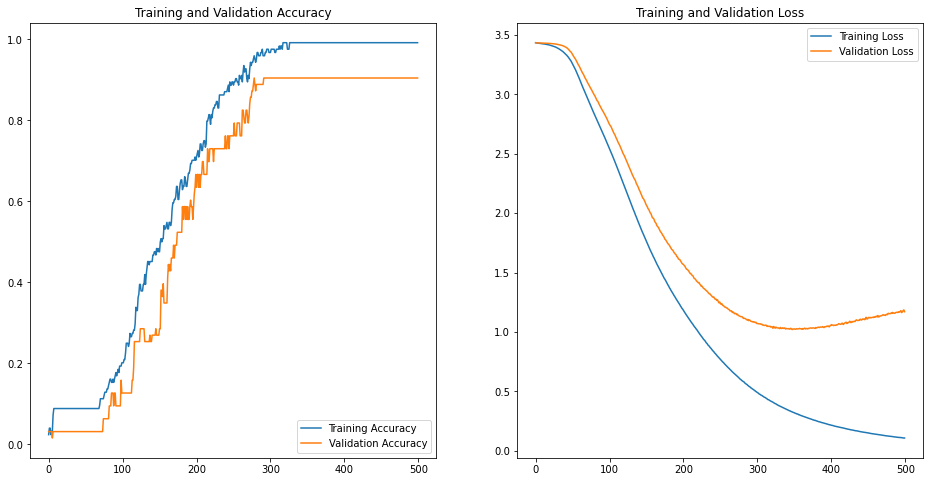

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [79]:
# # to save the trained model
# model.save("chat_model")

# import pickle

# # to save the fitted tokenizer
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# # to save the fitted label encoder
# with open('label_encoder.pickle', 'wb') as ecn_file:
#     pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

Model Improvement
---

In [80]:
# Training 
K.clear_session()

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
# model2.add(GlobalAveragePooling1D())
model2.add(Dropout(0.2))
model2.add(LSTM(10))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

# sgd = SGD(learning_rate=0.07, momentum = 0.9)

model2.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 dropout (Dropout)           (None, 20, 16)            0         
                                                                 
 lstm (LSTM)                 (None, 10)                1080      
                                                                 
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 31)                527       
                                                                 
Total params: 18,055
Trainable params: 18,055
Non-traina

In [81]:
# training

epochs = 500
history2 = model2.fit(padded_sequences, np.array(training_labels), epochs=epochs, validation_data= (padded_sequences_val, np.array(training_labels_val)))


Epoch 1/500
4/4 [==============================] - 2s 171ms/step - loss: 3.4345 - accuracy: 0.0403 - val_loss: 3.4336 - val_accuracy: 0.0635
Epoch 2/500
4/4 [==============================] - 0s 15ms/step - loss: 3.4331 - accuracy: 0.0323 - val_loss: 3.4329 - val_accuracy: 0.0635
Epoch 3/500
4/4 [==============================] - 0s 14ms/step - loss: 3.4313 - accuracy: 0.0968 - val_loss: 3.4322 - val_accuracy: 0.0317
Epoch 4/500
4/4 [==============================] - 0s 14ms/step - loss: 3.4299 - accuracy: 0.1048 - val_loss: 3.4312 - val_accuracy: 0.0317
Epoch 5/500
4/4 [==============================] - 0s 14ms/step - loss: 3.4281 - accuracy: 0.0968 - val_loss: 3.4300 - val_accuracy: 0.0317
Epoch 6/500
4/4 [==============================] - 0s 15ms/step - loss: 3.4262 - accuracy: 0.0968 - val_loss: 3.4287 - val_accuracy: 0.0317
Epoch 7/500
4/4 [==============================] - 0s 14ms/step - loss: 3.4245 - accuracy: 0.0968 - val_loss: 3.4270 - val_accuracy: 0.0317
Epoch 8/500
4/4 [==

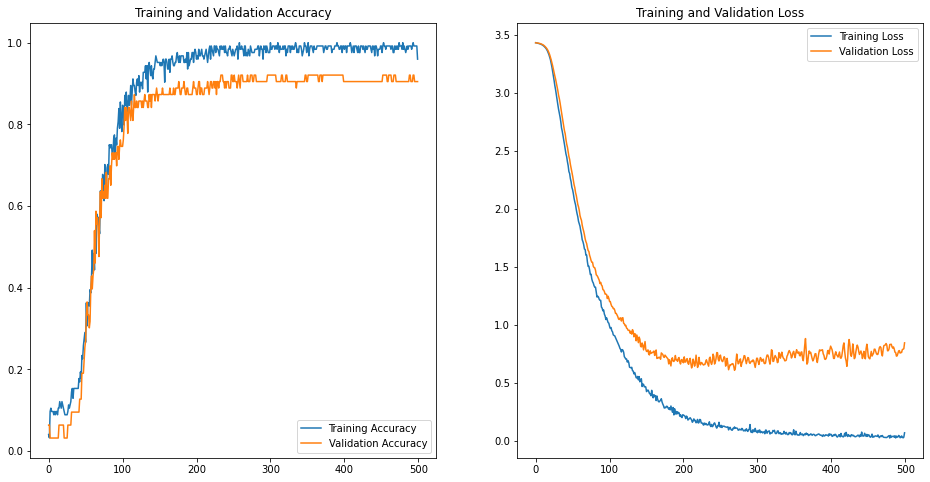

In [82]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [56]:
result2 = model2.evaluate(padded_sequences_val, np.array(training_labels_val))

2/2 [==============================] - 0s 3ms/step - loss: 0.8497 - accuracy: 0.8889


In [83]:
# to save the trained model
model2.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

2022-09-28 21:15:06.888572: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: chat_model/assets


INFO:tensorflow:Assets written to: chat_model/assets
